<h2> Objective of this notebook </h2>
<p> To explore a dataset concerning bodyfat and examine which factors contribute more to body fat (interpretability) and to predict body fat (predictability) where direct measurement is not readily available.</p>

<h2> Source of dataset </h2>
<p> From Kaggle: <a href=https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset>Body fat predictdion dataset </a></p>
<p> All body measurements refer to the circumference in cm, weight in lb, height in inches, density in g/cm^3 </p>
<p> BodyFat as percentage (scalar) </p>

<h2> Exploratory Data Analysis </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<br>
<p> <strong>Basic information</strong> of the dataset </p>

In [2]:
df = pd.read_csv('bodyfat.csv')
print('Dataset shape:',df.shape)
print('Datatypes:', df.dtypes.unique())
print('With null values:',df.isnull().values.any())

Dataset shape: (252, 15)
Datatypes: [dtype('float64') dtype('int64')]
With null values: False


<p>Split columns into features and target. Here density is dropped because according to the dataset description,
it is calculated from formula. The primitive aim is to predict the bodyfat by measurement of body parts.</p>

In [3]:
x = df.drop(['BodyFat','Density'],axis=1)
y = df['BodyFat']
x.head(3)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


<br>
<p> Convert to  S.I. unit, body parts from cm to m, weight from lb to kg, height from inches to m </p>

In [4]:
x_si = x.copy()
x_si['Weight'] = x_si['Weight']*0.453592
x_si['Height'] = x_si['Height']*2.54/100
x_si.iloc[:,3:] = x_si.iloc[:,3:]/100
x_si.head(3)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,69.966566,1.72085,0.362,0.931,0.852,0.945,0.590,0.373,0.219,0.320,0.274,0.171
1,22,78.584814,1.83515,0.385,0.936,0.830,0.987,0.587,0.373,0.234,0.305,0.289,0.182
2,22,69.853168,1.68275,0.340,0.958,0.879,0.992,0.596,0.389,0.240,0.288,0.252,0.166


<br> 
<p>A <strong>boxplot</strong> on features reveals some <strong>outliers</strong> which may need further exploration </p>

[Text(0, 0, 'BodyFat')]

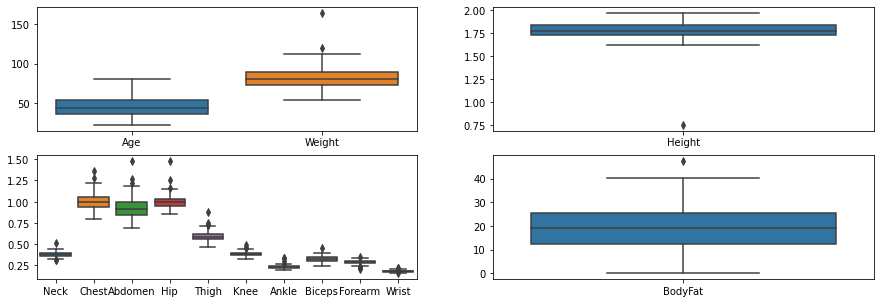

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,5))

sns.boxplot(data=x_si.iloc[:,0:2], ax=ax[0][0])
sns.boxplot(data=x_si.iloc[:,2], ax=ax[0][1])
ax[0][1].set_xticklabels(['Height']) #for single boxplot

sns.boxplot(data=x_si.iloc[:,3:], ax=ax[1][0])
sns.boxplot(data=y, ax=ax[1][1])
ax[1][1].set_xticklabels(['BodyFat']) #for single boxplot

<br>
<p> Brief <strong>description</strong> of the dataset</p>

In [6]:
df_si = pd.concat([x_si,y],axis=1)
df_si.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,252.0,44.884921,12.602040,22.000000,35.750000,43.000000,54.000000,81.000000
Weight,252.0,81.158679,13.330688,53.750652,72.121128,80.058988,89.357624,164.721935
Height,252.0,1.781780,0.093037,0.749300,1.733550,1.778000,1.835150,1.974850
Neck,252.0,0.379921,0.024309,0.311000,0.364000,0.380000,0.394250,0.512000
Chest,252.0,1.008242,0.084305,0.793000,0.943500,0.996500,1.053750,1.362000
Abdomen,252.0,0.925560,0.107831,0.694000,0.845750,0.909500,0.993250,1.481000
Hip,252.0,0.999048,0.071641,0.850000,0.955000,0.993000,1.035250,1.477000
Thigh,252.0,0.594060,0.052500,0.472000,0.560000,0.590000,0.623500,0.873000
Knee,252.0,0.385905,0.024118,0.330000,0.369750,0.385000,0.399250,0.491000
Ankle,252.0,0.231024,0.016949,0.191000,0.220000,0.228000,0.240000,0.339000


<br>
<p> From the brief statistics above, there may be some inconsistency in the data such as </p>
<ul>
    <li> Max. weight at 164.7kg </li>
    <li> Min. height at 0.75m</li>
    <li> BodyFat at 0% </li>
</ul>

In [7]:
df_si[(df_si['Weight']==df_si['Weight'].max()) | 
      (df_si['Height']==df_si['Height'].min()) |
      (df_si['BodyFat']==df_si['BodyFat'].min())|
      (df_si['BodyFat']==df_si['BodyFat'].max())]

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
38,46,164.721935,1.83515,0.512,1.362,1.481,1.477,0.873,0.491,0.296,0.450,0.290,0.214,35.2
41,44,92.986360,0.74930,0.366,1.060,1.043,1.155,0.706,0.425,0.237,0.336,0.287,0.174,32.9
181,40,53.750652,1.72720,0.338,0.793,0.694,0.850,0.472,0.335,0.202,0.277,0.246,0.165,0.0
215,51,99.336648,1.62560,0.412,1.198,1.221,1.128,0.625,0.369,0.236,0.347,0.291,0.184,47.5


<br>
<p> The features suggest that <strong>height at 0.75m </strong>(row 41) is an <strong>outlier</strong> in most other body measurements. The figure itself is doubtful. For weight at 164.7kg (row 38), although at its extreme, it also correponds to the extremes of most of the body measurements. There is no apparenet deviation from the trend of data points which suggests that it may not need to be removed. Similar argument for BodyFat at 47.5% and it is not removed. A pairplot is shown below. <strong>Two largest values of Ankle circumference</strong> (rows 30 and 85) can be considered inconsistent and <strong>dropped</strong>. </p>

In [8]:
x_si['Ankle'].sort_values(ascending=False).head(7)

30     0.339
85     0.337
38     0.296
221    0.270
40     0.266
34     0.263
193    0.260
Name: Ankle, dtype: float64

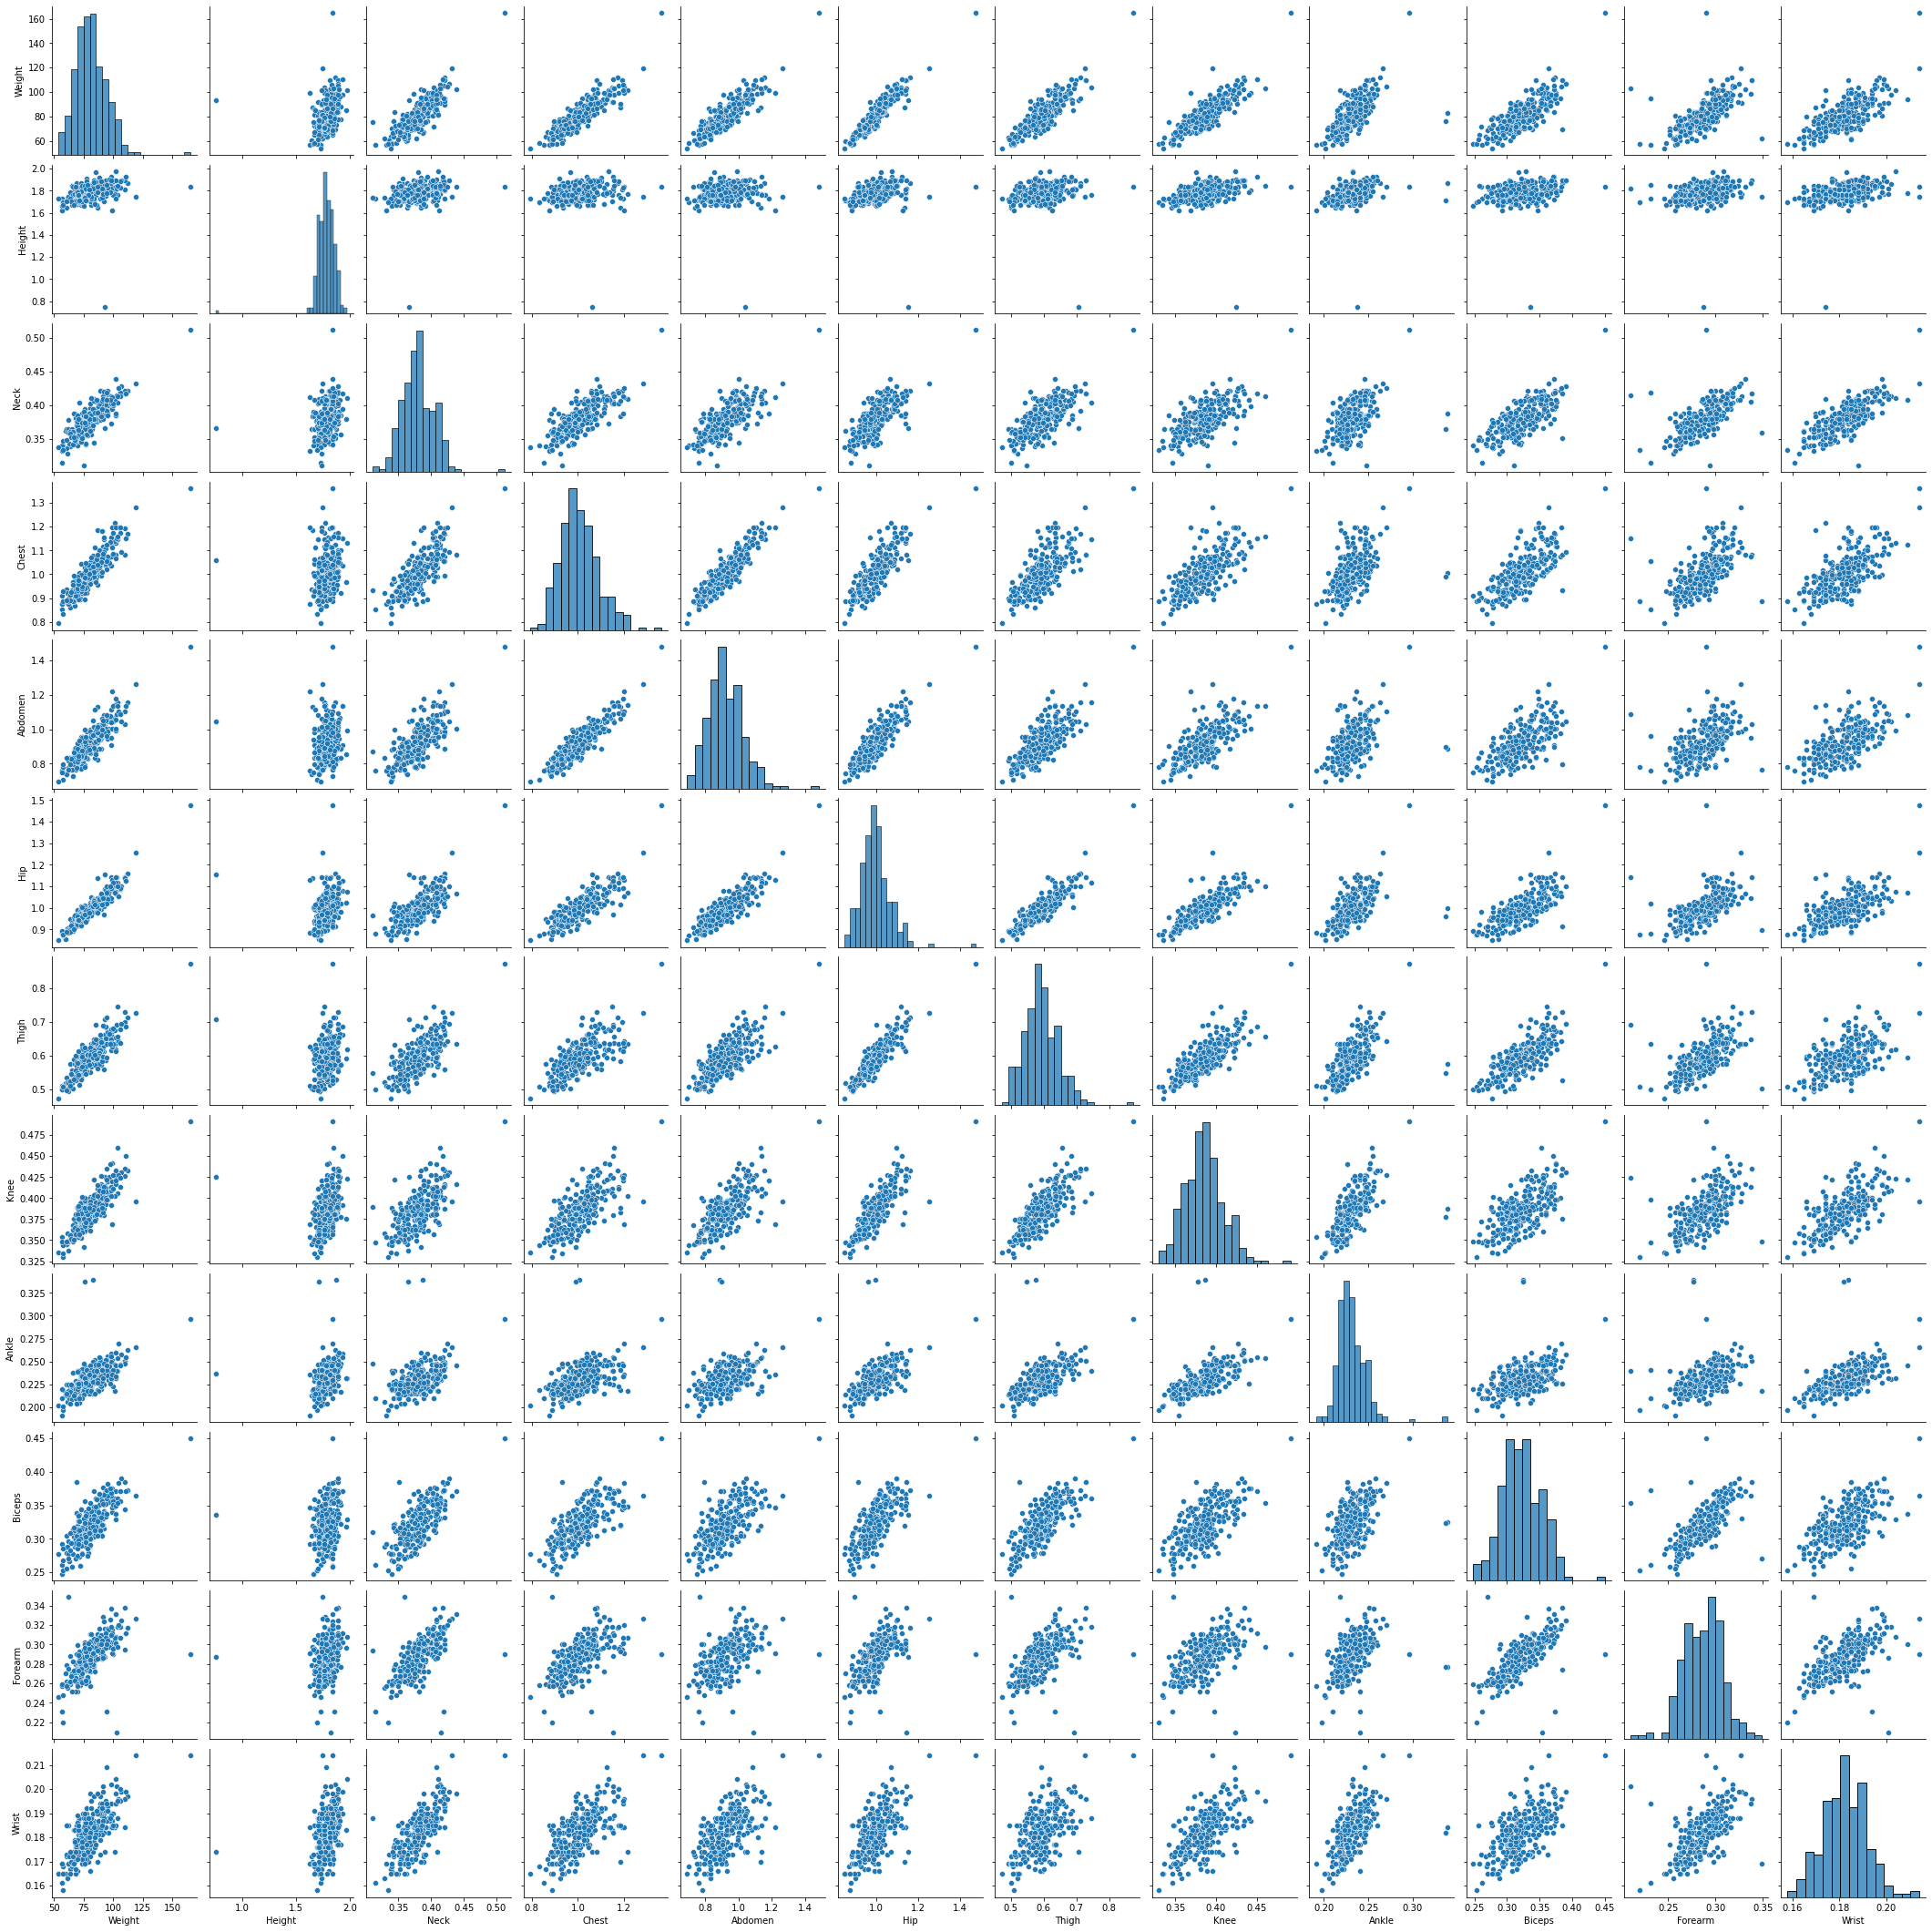

In [9]:
sns.pairplot(x_si.drop('Age', axis=1)) #Age is not indicative for studying the extremes of body parts.

<p><strong>BodyFat</strong> is also doubtful at <strong>0% and 0.7%</strong> and can be <strong>dropped</strong></p>

In [10]:
y.sort_values()[0:7]

181    0.0
171    0.7
170    3.0
25     3.7
28     3.7
54     3.9
49     4.0
Name: BodyFat, dtype: float64

<p> <strong>Total 5 obserations</strong> (rows 30, 41, 85, 171, 181) are <strong>reasonably dropped</strong> having regard to suspected inconsistency </p> 

In [11]:
x_si.drop([30,41,85,171,181], inplace=True)
y.drop([30,41,85,171,181], inplace=True)

<p><strong>Pairplot</strong> with observations dropped as follows</p>

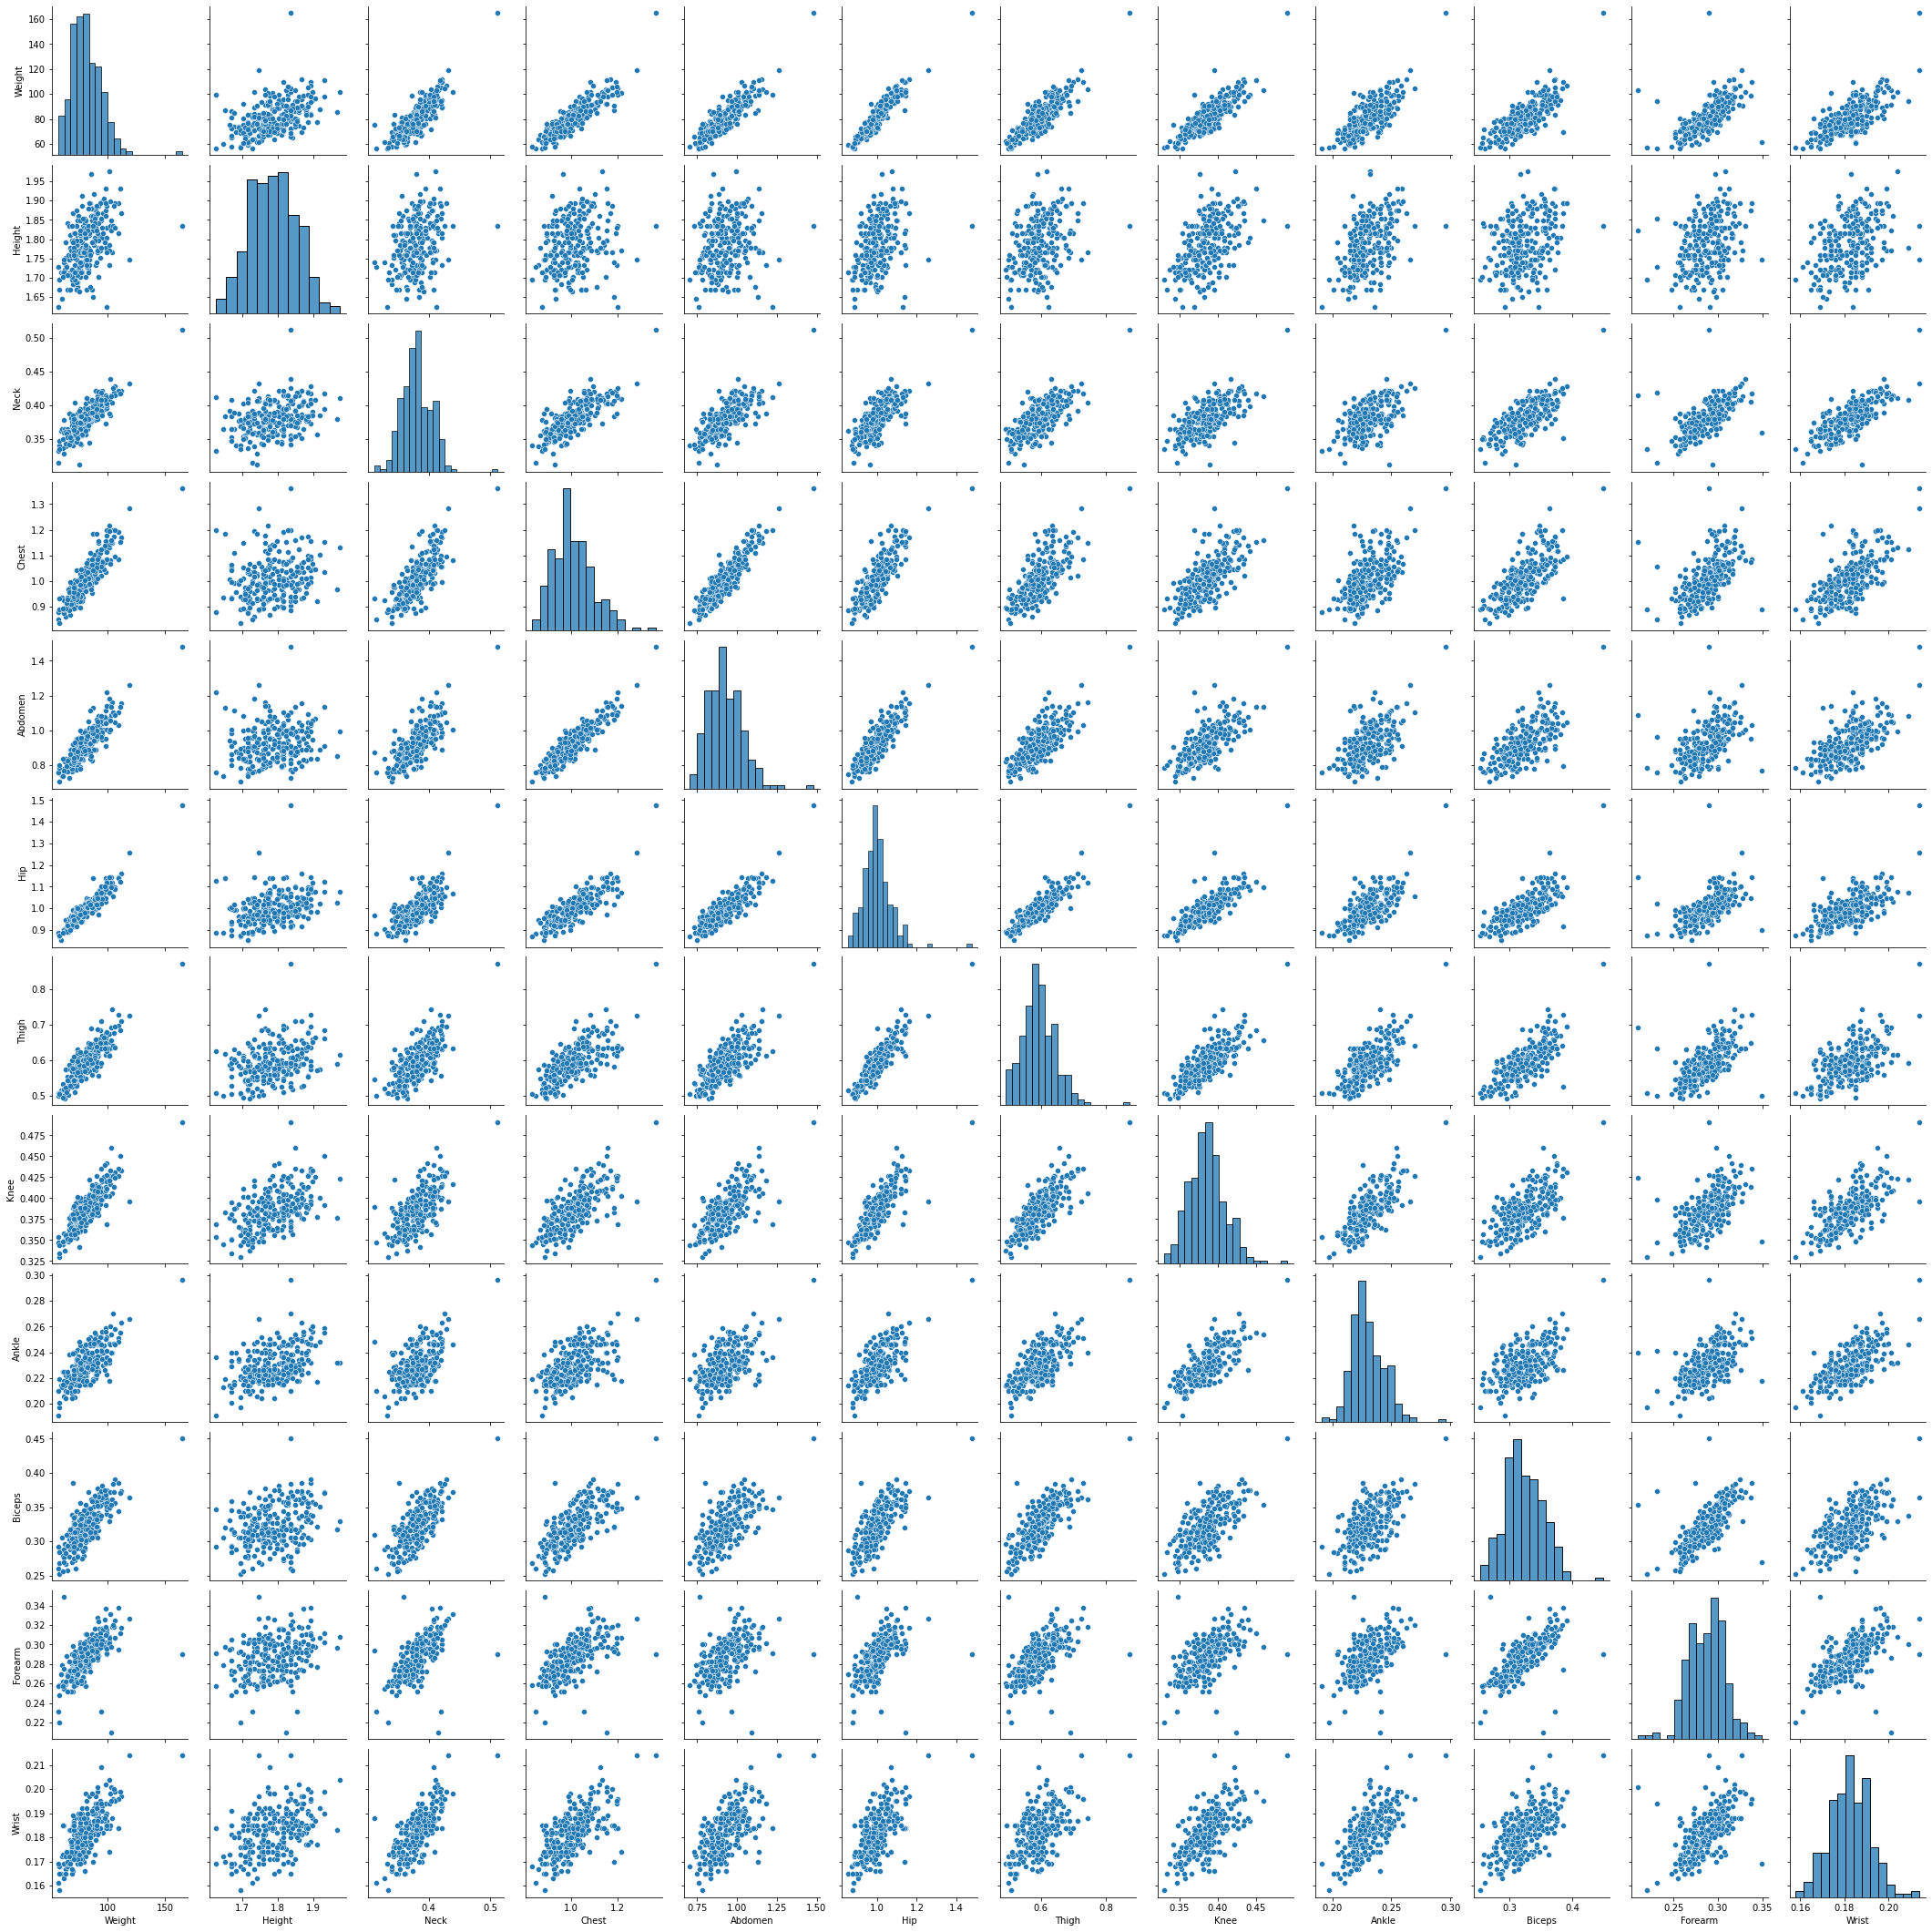

In [12]:
sns.pairplot(x_si.drop('Age', axis=1))

<br>
<p> Then the <strong>normality</strong> of the target variable <strong>BodyFat </strong>is also examined. </p>
<p> A desnity plot is followed by normaltest. It turns out that the p value is about 0.21 > 0.05, the normality of the target (null hypothesis) cannot be rejected. </p>

NormaltestResult(statistic=3.12290692315828, pvalue=0.20983086834892223)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

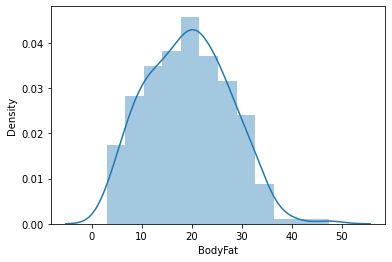

In [13]:
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
print(normaltest(y))
sns.distplot(y)

<h2> Feature Selection and Engineering </h2>

<p> When creating polynomial features, it is pre-selected that cross-terms should cover body measurements. Cross-terms such as Age x Wrist or Age^2 x Height may not provide insights. Also, the degree of polynomial features could be set up to 3 representing the volume (in m^3 unit). </p>

In [14]:
from sklearn.preprocessing import PolynomialFeatures as PR

<h4> Degree 2 </h4>

In [15]:
pr2 = PR(degree=2, include_bias=False)

In [16]:
x_si_body = x_si.drop(['Age'], axis=1)

In [17]:
x_si_body_pr2 = pr2.fit_transform(x_si_body)

In [18]:
x_si_age = x_si[['Age']].reset_index(drop=True)
x_si_age['Age^2'] = np.square(x_si_age)

In [19]:
x_si_pr2 = pd.DataFrame(x_si_body_pr2, columns = pr2.get_feature_names(input_features=x_si_body.columns.values))
x_si_pr2 = pd.concat([x_si_age, x_si_pr2], axis=1)
x_si_pr2.head(3)

,Age,Age^2,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,...,Ankle^2,Ankle Biceps,Ankle Forearm,Ankle Wrist,Biceps^2,Biceps Forearm,Biceps Wrist,Forearm^2,Forearm Wrist,Wrist^2
0,23,529,69.966566,1.72085,0.362,0.931,0.852,0.945,0.590,0.373,...,0.047961,0.07008,0.060006,0.037449,0.102400,0.087680,0.054720,0.075076,0.046854,0.029241
1,22,484,78.584814,1.83515,0.385,0.936,0.830,0.987,0.587,0.373,...,0.054756,0.07137,0.067626,0.042588,0.093025,0.088145,0.055510,0.083521,0.052598,0.033124
2,22,484,69.853168,1.68275,0.340,0.958,0.879,0.992,0.596,0.389,...,0.057600,0.06912,0.060480,0.039840,0.082944,0.072576,0.047808,0.063504,0.041832,0.027556


<h4> Degree 3 </h4>

In [20]:
pr3 = PR(degree=3, include_bias=False)

In [21]:
x_si_body_pr3 = pr3.fit_transform(x_si_body)
x_si_age['Age^3'] = np.power(x_si_age['Age'],3)

In [22]:
x_si_pr3 = pd.DataFrame(x_si_body_pr3, columns = pr3.get_feature_names(input_features=x_si_body.columns.values))
x_si_pr3 = pd.concat([x_si_age, x_si_pr3], axis=1)
x_si_pr3.head(3)

,Age,Age^2,Age^3,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Biceps^3,Biceps^2 Forearm,Biceps^2 Wrist,Biceps Forearm^2,Biceps Forearm Wrist,Biceps Wrist^2,Forearm^3,Forearm^2 Wrist,Forearm Wrist^2,Wrist^3
0,23,529,12167,69.966566,1.72085,0.362,0.931,0.852,0.945,0.590,...,0.032768,0.028058,0.017510,0.024024,0.014993,0.009357,0.020571,0.012838,0.008012,0.005000
1,22,484,10648,78.584814,1.83515,0.385,0.936,0.830,0.987,0.587,...,0.028373,0.026884,0.016931,0.025474,0.016042,0.010103,0.024138,0.015201,0.009573,0.006029
2,22,484,10648,69.853168,1.68275,0.340,0.958,0.879,0.992,0.596,...,0.023888,0.020902,0.013769,0.018289,0.012048,0.007936,0.016003,0.010542,0.006944,0.004574


In [23]:
x_si = x_si.reset_index(drop=True)
y = y.reset_index(drop=True)

<p> There are 3 datasets x_si, x_si_pr2, and x_si_pr3 corresponding to (selected) polynomial features of degree 1, 2, and 3</p>

<h2> Model Training </h2>

<p> The idea goes as follows: </p>
<ol>
    <li>Train_test_split of the dataset</li>
    <li>Apply Standard Scaler</li>
    <li>Call GridSearchCV on Lasso and Ridge at different degrees 
        by fitting x_train, y_train to obtain the best hyperparameters &alpha;</li>
    <li>Compute respective r2_scores
</ol>

In [24]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict

from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge

from sklearn.metrics import r2_score, mean_squared_error as MSE

<p> First to perform <strong>train test split</strong>, and then <strong>GridSearchCV</strong> on hyperparameters. </p>

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_si, y, test_size=0.3, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_si_pr2, y, test_size=0.3, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x_si_pr3, y, test_size=0.3, random_state=42)

In [26]:
train_sets = [(x_train, y_train), (x2_train, y2_train), (x3_train, y3_train)]
best_hyper = {}
alpha_score = {}
for model in [LR(), Lasso(), Ridge()]:
    estimator = Pipeline([("scaler", StandardScaler()),("model", model)])
    
    if str(model) != str(LR()):
        params = {'model__alpha': np.geomspace(1e-3, 20, 50)}
    else:
        params = {} #no alpha for LR
        
    grid = GridSearchCV(estimator, params, cv=4)
    
    bs, deg = 0,0
    for idx, (u,v) in enumerate(train_sets):
        grid.fit(u, v)
        print('model: {} degree: {} best score: {}'.format(str(model), idx+1, grid.best_score_))
        if grid.best_score_ >= bs:
            bs, deg = max(bs, grid.best_score_), idx+1
            
    grid.best_params_['best_score'] = bs
    grid.best_params_['best_deg'] = deg
    
    best_hyper[str(model)] = grid.best_params_

model: LinearRegression() degree: 1 best score: 0.6608818729910823
model: LinearRegression() degree: 2 best score: -7.4542204508959795
model: LinearRegression() degree: 3 best score: -139.634876563914
model: Lasso() degree: 1 best score: 0.6608717750834132
model: Lasso() degree: 2 best score: 0.6832169712312466
model: Lasso() degree: 3 best score: 0.6899506983562189
model: Ridge() degree: 1 best score: 0.6609182667856661
model: Ridge() degree: 2 best score: 0.6804053296623102
model: Ridge() degree: 3 best score: 0.6773267600999753


In [27]:
best_hyper

{'LinearRegression()': {'best_score': 0.6608818729910823, 'best_deg': 1},
 'Lasso()': {'model__alpha': 0.069710559685117,
  'best_score': 0.6899506983562189,
  'best_deg': 3},
 'Ridge()': {'model__alpha': 10.906907465438707,
  'best_score': 0.6804053296623102,
  'best_deg': 2}}

<br>
<p> As seen, <strong>polynomial features at degree 3 best fit Lasso and degree 2 best fit Ridge </strong> with respective &alpha;. On the other hand, the <strong>Linear Regression model is best fit without polynomial features</strong>. The negative scores mean the models have done poor fitting Therefore, 3 models will be compared: Lasso and Ridge at respective best estimator, and Linear Regression without polynomial features. </p>

<h3> Model Evaluation </h3>

<h4> Linear Regression </h4>

In [28]:
lr = LR()
s = StandardScaler()
x_train_ss = s.fit_transform(x_train)
x_test_ss = s.transform(x_test)

lr.fit(x_train_ss, y_train)
y_lr = lr.predict(x_test_ss)
r2_lr = r2_score(y_test, y_lr)
mse_lr = MSE(y_test, y_lr)

print('R2 score for linear regression without polynomial features is:', r2_lr)
print('Its mean squared error is:', mse_lr)

R2 score for linear regression without polynomial features is: 0.7567632006492067
Its mean squared error is: 15.654627868128062


<h4> Lasso </h4>

In [29]:
las = Lasso(alpha=best_hyper['Lasso()']['model__alpha'])
s = StandardScaler()
x3_train_ss = s.fit_transform(x3_train) #degree 3 polynomials
x3_test_ss = s.fit_transform(x3_test)

las.fit(x3_train_ss, y3_train)
y_las = las.predict(x3_test_ss)
r2_las = r2_score(y_test, y_las)
mse_las = MSE(y_test, y_las)

print('R2 score for Lasso regression with degree {} polynomial features is:'
      .format(best_hyper['Lasso()']['best_deg']), r2_las)
print('Its mean squared error is:', mse_las)

R2 score for Lasso regression with degree 3 polynomial features is: 0.7563604809418288
Its mean squared error is: 15.680546755282425


<h4> Ridge </h4>

In [30]:
rr = Ridge(alpha=best_hyper['Ridge()']['model__alpha'])
s = StandardScaler()
x2_train_ss = s.fit_transform(x2_train) #degree 2 polynomials
x2_test_ss = s.fit_transform(x2_test)

rr.fit(x2_train_ss, y2_train)
y_rr = rr.predict(x2_test_ss)
r2_rr = r2_score(y_test, y_rr)
mse_rr = MSE(y_test, y_rr)

print('R2 score for Ridge regression with degree {} polynomial features is:'
      .format(best_hyper['Ridge()']['best_deg']), r2_rr)
print('Its mean squared error is:', mse_rr)

R2 score for Ridge regression with degree 2 polynomial features is: 0.7549356153615217
Its mean squared error is: 15.772250561948804


<h4> Weighting of features in different models </h4>

<p> It is also worth exploring the weighting of features in different models in the order of magnitudes </p>

In [31]:
lr_coef = pd.DataFrame(zip(x_si, lr.coef_.flatten()), columns=['lr_features','lr_w'])
lr_w = lr_coef[lr_coef['lr_w'] != 0].sort_values(by='lr_w', key=abs, ascending=False).head(5)

In [32]:
las_coef = pd.DataFrame(zip(x_si_pr3, las.coef_), columns=['las_features','las_w'])
las_w = las_coef[las_coef['las_w'] != 0].sort_values(by='las_w', key=abs, ascending=False).head(5)

In [33]:
rr_coef = pd.DataFrame(zip(x_si_pr3, rr.coef_.flatten()), columns=['rr_features','rr_w'])
rr_w = rr_coef[rr_coef['rr_w'] != 0].sort_values(by='rr_w', key=abs, ascending=False).head(5)

In [34]:
lr_w, las_w, rr_w = map(lambda z : z.reset_index(drop=True), [lr_w, las_w, rr_w])

model_coef = pd.concat([lr_w, las_w, rr_w], axis=1).fillna('-')
model_coef

,lr_features,lr_w,las_features,las_w,rr_features,rr_w
0,Abdomen,11.416868,Abdomen,9.560820,Chest,2.060609
1,Weight,-4.127369,Weight^3,-2.542629,Height Chest,1.467684
2,Hip,-1.629122,Wrist,-0.794606,Abdomen Biceps,1.347328
3,Wrist,-1.532807,Height Neck Wrist,-0.624914,Chest Wrist,1.281436
4,Thigh,1.437027,Biceps,0.522360,Wrist,-1.275902


<h4> Graphical illustration </h4>
<p> To plot graph of <strong>predicted y against y_test </strong> for different models</p>

Text(0, 0.5, 'model prediction')

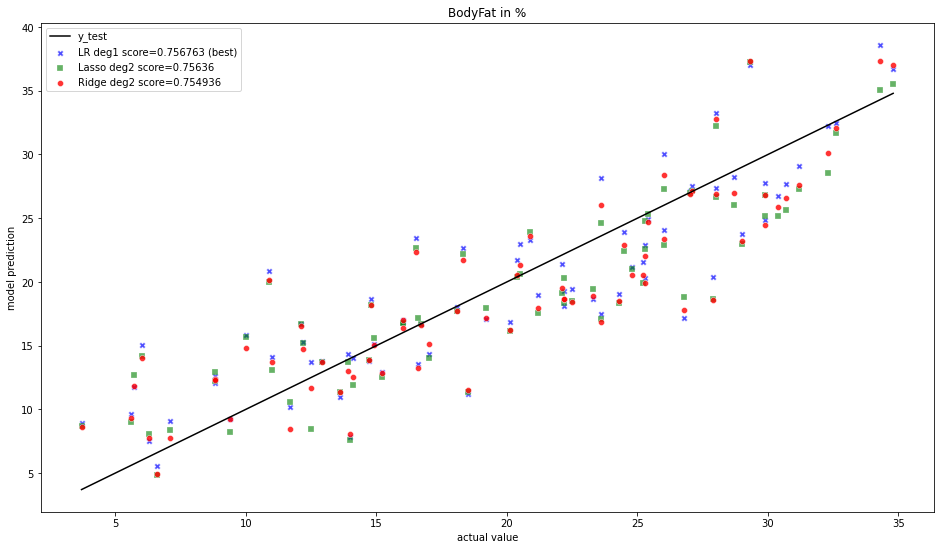

In [35]:
fig, ax = plt.subplots(figsize=(16,9))
sns.scatterplot(y_test, y_lr, color='blue', marker='X', ax=ax, alpha=0.7, 
                label='LR deg1 score={} (best)'.format(round(r2_lr,6)))
sns.scatterplot(y_test, y_las, color='green', marker='s', ax=ax, alpha=0.6, 
                label='Lasso deg2 score={}'.format(round(r2_las,6)))
sns.scatterplot(y_test, y_rr, color='red', marker='o', ax=ax, alpha=0.8, 
                label='Ridge deg2 score={}'.format(round(r2_rr,6)))

sns.lineplot(y_test, y_test, color='black', alpha=1, marker='', ls='-', ax=ax, label='y_test')

ax.set_title('BodyFat in %')
ax.set_xlabel('actual value')
ax.set_ylabel('model prediction')

In [36]:
pd.DataFrame(columns=['Model','R2 score','MSE'], 
             data=[['LR', r2_lr, mse_lr],
                   ['Lasso', r2_las, mse_las],
                   ['Ridge', r2_rr, mse_rr]])

,Model,R2 score,MSE
0,LR,0.756763,15.654628
1,Lasso,0.756360,15.680547
2,Ridge,0.754936,15.772251


<p> The best model is Linear Regression without polynomial features. It has the highest R2 score of about 0.756763, which means the model can explain about 75.7% of the variance of the data. It also has the smallest MSE of about 15.654628. </p>

<h2> Summary </h2>

<p> From the above analysis, the <strong>best model</strong> in prediction is <strong>Linear Regression without polynomial features</strong>, although the Lasso gives better training results. </p>

<p> The <strong>R2_score</strong> of the best model is about <strong>0.756763</strong>. It explains about 75.7% of the variance of the data.</p>

<p> The 3 models only differ a little in R2 score and MSE. </p>

<p> For the features, the best model and Lasso suggest <strong>Abdomen</strong> is the <strong>most positively impactful parameter</strong> in predicting <strong>BodyFat</strong>. Ridge suggests Chest instead. The best model and Lasso also suggest negative impact by Wrist or Wrist^3.</p> 

<h4> Possible Improvements </h4>
<p> The authenticity of original dataset may be improved by <strong>clarification of further suspected outliers or typos</strong>.</p>
<p>A <strong>finer scale of hyperparameter &alpha;</strong> may be deployed to identify better Lasso or Ridge model. </p>